<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/TP1cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)

# Para visuzalización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 16
from IPython.display import Audio, Markdown, Image

def dmd(x):
    display(Markdown(x))

# Números y Datos
import numpy as np
import pandas as pd
import random

# Clustering (scipy)
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

# Clustering (sklearn)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors

# Clustering (otros)
!pip install gower
import gower

!pip install scikit-learn-extra 
from sklearn_extra.cluster import KMedoids 

In [81]:
# LEVANTAMOS EL ARCHIVO PICKLE
import pickle
df_total = pd.read_pickle('df_total.p')
print(df_total.shape)
df_total.head(10)

(4082, 71)


,id,mp0,mp1,mp2,mp3,mp4,mp5,mp6,mp7,mp8,mp9,mp10,mp11,sdp0,sdp1,sdp2,sdp3,sdp4,sdp5,sdp6,sdp7,sdp8,sdp9,sdp10,sdp11,mt0,mt1,mt2,mt3,mt4,mt5,mt6,mt7,mt8,mt9,mt10,mt11,sdt0,sdt1,sdt2,sdt3,sdt4,sdt5,sdt6,sdt7,sdt8,sdt9,sdt10,sdt11,mt0_norm,artists,genre,release_date,album_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,speechiness_log,liveness_log,valence_log,valence_logit,acousticness_logit,instrumentalness_logit,energy_logit,loudness_logit
0,00At7PWydsvg7g5xgaYan9,0.354425,0.747412,0.286733,0.296011,0.303938,0.244281,0.300585,0.215238,0.425981,0.295721,0.338112,0.418549,0.630479,0.656402,0.436778,0.553574,0.570886,0.422492,0.545740,0.328688,0.595697,0.633451,0.665306,0.756192,0.942322,0.817997,0.555805,0.430032,0.664287,0.403409,0.520597,0.469829,0.463558,0.582029,0.613871,0.399939,0.253537,0.179836,0.256836,0.318495,0.242994,0.290617,0.318734,0.231227,0.139287,0.252666,0.261510,0.278275,0.698685,Matrix & Futurebound,drum-and-bass,2012,All I Know EP (feat. Luke Bingham),0.533827,0.927814,0.939500,0.057293,0.273092,0.003182,0.026639,0.817259,0.810248,-1.172031,-1.436055,-0.082359,1.566324,-0.929174,-4.315647,2.713416,2.933962
1,00BgcUYkIImsDN5rNjkR1U,0.233490,0.532633,0.119782,0.159206,0.311303,0.206850,0.411964,0.296472,0.577764,0.431916,0.343720,0.283267,0.524528,0.760283,0.262473,0.412054,0.679838,0.539311,0.770593,0.593922,0.793390,0.849812,0.597048,0.708635,0.921531,0.766888,0.395599,0.362725,0.593063,0.302356,0.538773,0.440944,0.328459,0.441780,0.653630,0.447183,0.301479,0.331171,0.300520,0.206070,0.395573,0.283929,0.359724,0.212639,0.321871,0.235968,0.310301,0.411293,0.658823,Maduk,drum-and-bass,2013,Feel Good,0.382664,0.942853,0.949102,0.046208,0.006235,0.557576,0.070934,0.104569,0.814705,-1.250204,-1.091867,-0.940935,-2.044902,-4.104221,0.271967,3.006179,3.154919
2,00WgnFIsY1y84p7mYAJRuF,0.510113,0.361699,0.416151,0.564027,0.381998,0.362252,0.395394,0.643339,0.437220,0.321494,0.458258,0.288363,0.764317,0.626131,0.668801,0.804309,0.630595,0.659452,0.727147,0.754426,0.745920,0.691701,0.657127,0.554382,0.772360,0.725894,0.502340,0.458222,0.515849,0.287753,0.670784,0.440100,0.290859,0.374617,0.782501,0.590861,0.517235,0.268070,0.677909,0.287937,0.521776,0.352472,0.469454,0.215663,0.332264,0.323902,0.290750,0.327383,0.515605,Apex,drum-and-bass,2012,Omega Point EP,0.468288,0.921798,0.855093,0.071529,0.000853,0.823232,0.076613,0.113706,0.815129,-1.088690,-1.062415,-0.907611,-1.957798,-4.512363,1.608711,2.614645,1.858252
3,00X2ieWUjpzdNwDU2Jlg6i,0.570225,0.575522,0.628908,0.371218,0.520357,0.314152,0.328446,0.503845,0.353149,0.402552,0.312743,0.404121,0.708006,0.624321,0.671485,0.445515,0.629442,0.464817,0.464944,0.660873,0.448533,0.627020,0.429563,0.550132,0.918607,0.728133,0.519574,0.339290,0.437220,0.454525,0.568017,0.500888,0.556014,0.518627,0.629329,0.351479,0.166163,0.113579,0.141874,0.217190,0.167308,0.221088,0.233026,0.193597,0.255875,0.268884,0.225137,0.247147,0.652674,The Mighty Mighty Bosstones,ska,2002,A Jackknife to a Swan,0.464059,0.956889,0.897723,0.051925,0.003574,0.000001,0.351575,0.730964,0.419984,-1.208132,-0.441802,-0.130203,1.050987,-4.285910,-4.594985,3.374210,2.286145
4,00isAURAZeKQXv6CW2vckb,0.350877,0.527437,0.231017,0.405664,0.214982,0.358833,0.264363,0.268953,0.415337,0.195314,0.375656,0.170481,0.660800,0.733016,0.441898,0.809989,0.436888,0.734512,0.606309,0.521148,0.705501,0.449678,0.711889,0.379830,0.523043,0.463577,0.573599,0.320815,0.582131,0.457297,0.529303,0.440957,0.700266,0.381577,0.659275,0.292890,0.404852,0.350354,0.259792,0.299978,0.325703,0.132756,0.786040,0.210715,0.593866,0.277373,0.254452,0.632434,0.410900,Gottfried Heinrich Stölzel,classical,2015,Divine Redeemer,0.238901,0.154819,0.575625,0.044224,0.940763,0.446465,0.113061,0.082335,0.320465,-1.265808,-0.909878,-1.034634,-2.285452,2.960621,-0.174584,-1.622804,0.345908
5,00kO4Z0mFAFs6KLlXnaD0f,0.440426,0.730124,0.217593,0.138963,0.079061,0.061542,0.078785,0.142725,0.567773,0.095690,0.12

In [82]:
df_total.columns

Index(['id', 'mp0', 'mp1', 'mp2', 'mp3', 'mp4', 'mp5', 'mp6', 'mp7', 'mp8',
       'mp9', 'mp10', 'mp11', 'sdp0', 'sdp1', 'sdp2', 'sdp3', 'sdp4', 'sdp5',
       'sdp6', 'sdp7', 'sdp8', 'sdp9', 'sdp10', 'sdp11', 'mt0', 'mt1', 'mt2',
       'mt3', 'mt4', 'mt5', 'mt6', 'mt7', 'mt8', 'mt9', 'mt10', 'mt11', 'sdt0',
       'sdt1', 'sdt2', 'sdt3', 'sdt4', 'sdt5', 'sdt6', 'sdt7', 'sdt8', 'sdt9',
       'sdt10', 'sdt11', 'mt0_norm', 'artists', 'genre', 'release_date',
       'album_name', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'speechiness_log', 'liveness_log', 'valence_log', 'valence_logit',
       'acousticness_logit', 'instrumentalness_logit', 'energy_logit',
       'loudness_logit'],
      dtype='object')

In [83]:
df_total.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 71 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4082 non-null   object 
 1   mp0                     4082 non-null   float64
 2   mp1                     4082 non-null   float64
 3   mp2                     4082 non-null   float64
 4   mp3                     4082 non-null   float64
 5   mp4                     4082 non-null   float64
 6   mp5                     4082 non-null   float64
 7   mp6                     4082 non-null   float64
 8   mp7                     4082 non-null   float64
 9   mp8                     4082 non-null   float64
 10  mp9                     4082 non-null   float64
 11  mp10                    4082 non-null   float64
 12  mp11                    4082 non-null   float64
 13  sdp0                    4082 non-null   float64
 14  sdp1                    4082 non-null   

In [84]:
df_total[df_total.valence_logit.isna()]

,id,mp0,mp1,mp2,mp3,mp4,mp5,mp6,mp7,mp8,mp9,mp10,mp11,sdp0,sdp1,sdp2,sdp3,sdp4,sdp5,sdp6,sdp7,sdp8,sdp9,sdp10,sdp11,mt0,mt1,mt2,mt3,mt4,mt5,mt6,mt7,mt8,mt9,mt10,mt11,sdt0,sdt1,sdt2,sdt3,sdt4,sdt5,sdt6,sdt7,sdt8,sdt9,sdt10,sdt11,mt0_norm,artists,genre,release_date,album_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,speechiness_log,liveness_log,valence_log,valence_logit,acousticness_logit,instrumentalness_logit,energy_logit,loudness_logit
178,0MkFNvK1QrA2aRViGFaZkq,0.527601,0.448624,0.446738,0.465851,0.343305,0.705478,0.335960,0.279197,0.250257,0.306987,0.756909,0.550856,0.735940,0.590683,0.536880,0.729231,0.382931,0.755715,0.444147,0.362609,0.337769,0.365515,0.779255,0.705974,0.847641,0.790388,0.389105,0.335220,0.316117,0.552631,0.421001,0.448114,0.433415,0.500493,0.577389,0.558724,0.155939,0.151703,0.254872,0.318736,0.157663,0.334035,0.310969,0.195287,0.160984,0.340178,0.266325,0.317327,0.565736,Bad Manners,ska,2012,Hi-Ho Silver Lining,0.676533,0.951876,0.835714,0.061144,0.036044,0.000922,0.030563,0.993909,0.691470,-1.147865,-1.391873,0.001694,NaN,-3.031016,-4.505974,3.228036,1.701372
411,0mZGuHBj9R2Hi1DSarkCUq,0.433181,0.499803,0.350324,0.501229,0.312999,0.368435,0.239917,0.449915,0.527641,0.240688,0.345695,0.253514,0.706460,0.735052,0.420373,0.749103,0.515245,0.685894,0.527906,0.630374,0.744032,0.473592,0.587494,0.428458,0.719295,0.771405,0.346494,0.439397,0.372177,0.587122,0.393259,0.541099,0.551528,0.485550,0.608002,0.546388,0.283729,0.237048,0.354762,0.414893,0.382157,0.506945,0.299759,0.309214,0.289199,0.431122,0.481559,0.379005,0.492565,Skankin' Pickle,ska,1996,The Green Album,0.567653,0.664133,0.742755,0.061144,0.044679,0.062525,0.168818,1.000000,0.659185,-1.147865,-0.747589,0.004321,NaN,-2.850050,-2.548531,0.726939,1.113358
681,1K0DdaxLaP2PszBxIBkULQ,0.617581,0.272246,0.334441,0.191885,0.449302,0.322807,0.362940,0.561655,0.240913,0.254043,0.285282,0.527013,0.846247,0.348004,0.615089,0.274403,0.595964,0.633297,0.598305,0.634497,0.428071,0.552459,0.463259,0.679987,0.856989,0.732621,0.491911,0.367187,0.386586,0.706241,0.429173,0.489812,0.355080,0.357607,0.507970,0.450823,0.278152,0.135892,0.198125,0.483648,0.335907,0.516075,0.356953,0.291579,0.465851,0.342556,0.582060,0.348874,0.574486,MU330,ska,2002,Ultra Panic,0.625793,0.623027,0.864083,0.053442,0.309237,0.000000,0.229737,0.991878,0.666761,-1.197621,-0.620265,0.000815,NaN,-0.757281,-4.595120,0.545225,1.937550
1829,3UnyYyMkoUx1I5TbRgtg11,0.325413,0.476658,0.453488,0.266607,0.460992,0.299072,0.421327,0.264049,0.417427,0.478502,0.228122,0.353169,0.557632,0.565908,0.744651,0.371141,0.724077,0.406420,0.705079,0.392265,0.601206,0.767516,0.361797,0.493709,0.834834,0.873446,0.304148,0.287361,0.373606,0.567874,0.277289,0.472763,0.573591,0.617346,0.606831,0.194756,0.326142,0.126305,0.330686,0.237507,0.239024,0.262632,0.255412,0.203597,0.265706,0.365662,0.335468,0.323564,0.554684,Madness,ska,2009,Total Madness (2012),0.727273,0.911772,0.843566,0.033839,0.006004,0.000032,0.049458,0.997970,0.596636,-1.358140,-1.225790,0.003447,NaN,-4.118782,-4.591870,2.466674,1.762849
2290,4NN6gFlTNVathWA3e4QTXp,0.363223,0.579369,0.618503,0.406847,0.353380,0.220382,0.366638,0.447615,0.384201,0.338057,0.326709,0.347610,0.612599,0.626542,0.706763,0.709453,0.535721,0.310128,0.575734,0.710033,0.465903,0.506680,0.465777,0.566039,0.761588,0.816090,0.383159,0.473322,0.281600,0.741630,0.422925,0.410228,0.485003,0.654821,0.383204,0.317573,0.211149,0.138720,0.375861,0.610137,0.248805,0.750001,0.348806,0.304648,0.270001,0.458059,0.565465,0.361546,0.510349,The English Beat,ska,1979,Tears of A Clown,0.793869,0.844599,0.795315,0.055659,0.023193,0.000568,0.005885,0.995939,0.731816,-1.182704,-1.799002,0.002572,NaN,-3.371667,-4.539331,1.771136,1.419850
2761,5K16Je2j1RTFrh7VqjEPcl,0.414592,0.398214,0.365275,0.337834,0.544161,0.446754,0.433489,0.434250,0.411771,0.459370,0.371104,0.436044,0.655735,0.588804,0.547882,0.501688,0.631155,0.635436,0.643862,0.595896,0.6507

#Todas las variables numéricas, elimino NA#

In [85]:
#DF = df_total.drop(['id','artists','genre','album_name','release_date','valence_logit','acousticness_logit', 
#                   'instrumentalness_logit','energy_logit','loudness_logit'], axis=1)
DF = df_total.drop(['id','artists','album_name','release_date'], axis=1)   

In [86]:
DF.columns

Index(['mp0', 'mp1', 'mp2', 'mp3', 'mp4', 'mp5', 'mp6', 'mp7', 'mp8', 'mp9',
       'mp10', 'mp11', 'sdp0', 'sdp1', 'sdp2', 'sdp3', 'sdp4', 'sdp5', 'sdp6',
       'sdp7', 'sdp8', 'sdp9', 'sdp10', 'sdp11', 'mt0', 'mt1', 'mt2', 'mt3',
       'mt4', 'mt5', 'mt6', 'mt7', 'mt8', 'mt9', 'mt10', 'mt11', 'sdt0',
       'sdt1', 'sdt2', 'sdt3', 'sdt4', 'sdt5', 'sdt6', 'sdt7', 'sdt8', 'sdt9',
       'sdt10', 'sdt11', 'mt0_norm', 'genre', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'speechiness_log', 'liveness_log',
       'valence_log', 'valence_logit', 'acousticness_logit',
       'instrumentalness_logit', 'energy_logit', 'loudness_logit'],
      dtype='object')

In [87]:
DF.describe()

,mp0,mp1,mp2,mp3,mp4,mp5,mp6,mp7,mp8,mp9,mp10,mp11,sdp0,sdp1,sdp2,sdp3,sdp4,sdp5,sdp6,sdp7,sdp8,sdp9,sdp10,sdp11,mt0,mt1,mt2,mt3,mt4,mt5,mt6,mt7,mt8,mt9,mt10,mt11,sdt0,sdt1,sdt2,sdt3,sdt4,sdt5,sdt6,sdt7,sdt8,sdt9,sdt10,sdt11,mt0_norm,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,speechiness_log,liveness_log,valence_log,valence_logit,acousticness_logit,instrumentalness_logit,energy_logit,loudness_logit
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4072.000000,3883.000000,4076.000000,3987.000000,4080.000000
mean,0.423272,0.423572,0.353962,0.316589,0.370451,0.347341,0.326951,0.377515,0.366869,0.335787,0.355752,0.359382,0.675741,0.609789,0.552372,0.540770,0.566645,0.584126,0.552165,0.589333,0.569079,0.607693,0.579709,0.609147,0.700776,0.652434,0.454329,0.347099,0.488849,0.455531,0.498971,0.451841,0.501737,0.454321,0.649670,0.455323,0.347884,0.294116,0.355238,0.343339,0.309646,0.299003,0.383638,0.237526,0.333564,0.332525,0.305088,0.365583,0.499820,0.467091,0.552175,0.736707,0.077912,0.416802,0.387383,0.179050,0.346238,0.568494,-1.121462,-0.851121,-0.609834,-0.771688,-0.958999,-1.214661,0.483124,1.259677
std,0.159062,0.170415,0.145745,0.133497,0.140917,0.139016,0.132923,0.138726,0.149836,0.132053,0.152625,0.142635,0.127206,0.119438,0.148457,0.158454,0.145660,0.157576,0.143710,0.139580,0.149576,0.147409,0.153142,0.156341,0.175696,0.149923,0.137816,0.086089,0.139687,0.132954,0.119778,0.068404,0.114588,0.114920,0.113207,0.106899,0.144550,0.132992,0.148998,0.150020,0.115805,0.150634,0.139610,0.101092,0.126101,0.123216,0.133927,0.131261,0.096604,0.196402,0.340881,0.164114,0.066009,0.420862,0.394439,0.171933,0.273546,0.153869,0.212149,0.317548,0.408604,1.649446,3.432915,2.955575,2.322026,0.935900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-4.595120,-4.595120,-4.595120,-4.595120,-4.595120
25%,0.310479,0.297935,0.248284,0.221841,0.270508,0.251850,0.235678,0.281424,0.257842,0.247190,0.247666,0.257582,0.605565,0.548565,0.458183,0.441066,0.470723,0.475537,0.460192,0.504140,0.479849,0.518175,0.483594,0.514859,0.581055,0.565341,0.362424,0.291169,0.410262,0.376519,0.428919,0.415901,0.428507,0.373986,0.587025,0.388019,0.248140,0.198744,0.254021,0.228980,0.230704,0.185251,0.291050,0.164891,0.248917,0.245990,0.206017,0.277027,0.435079,0.312896,0.217982,0.641785,0.044224,0.001923,0.000741,0.077336,0.108629,0.440802,-1.265808,-1.058806,-0.925808,-2.005473,-4.461733,-4.523848,-1.262977,0.626074
50%,0.422400,0.415484,0.347690,0.309562,0.365382,0.337414,0.316728,0.370589,0.355489,0.324698,0.344498,0.354061,0.690912,0.622150,0.564649,0.544285,0.573727,0.589771,0.559416,0.602079,0.578128,0.620356,0.584375,0.615629,0.738320,0.673848,0.439126,0.346166,0.490571,0.456101,0.503711,0.452339,0.501915,0.451262,0.657730,0.456188,0.34199

In [88]:
DF = DF.dropna()


In [89]:
DF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3772 entries, 0 to 4081
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mp0                     3772 non-null   float64
 1   mp1                     3772 non-null   float64
 2   mp2                     3772 non-null   float64
 3   mp3                     3772 non-null   float64
 4   mp4                     3772 non-null   float64
 5   mp5                     3772 non-null   float64
 6   mp6                     3772 non-null   float64
 7   mp7                     3772 non-null   float64
 8   mp8                     3772 non-null   float64
 9   mp9                     3772 non-null   float64
 10  mp10                    3772 non-null   float64
 11  mp11                    3772 non-null   float64
 12  sdp0                    3772 non-null   float64
 13  sdp1                    3772 non-null   float64
 14  sdp2                    3772 non-null   

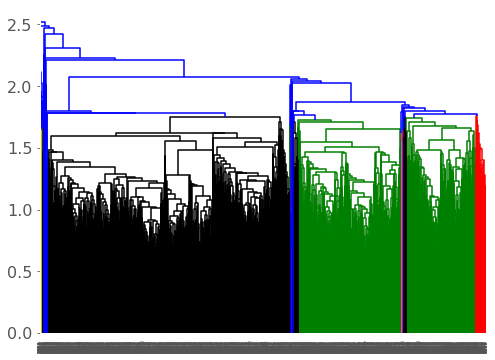

In [90]:
DF1=DF.drop(['genre'], axis=1)
DF1=scaler.fit_transform(DF1)
z = linkage(DF1, method='average', metric='euclidean')
plt.figure()
dn = dendrogram(z)

In [92]:
kmeans1 = KMeans(n_clusters=9, random_state=0).fit(DF1)
kmeans1.labels_

array([5, 7, 7, ..., 8, 1, 3], dtype=int32)

In [94]:
tmp1 = pd.DataFrame({'Labels': DF.genre, 'Clusters': kmeans1.labels_})# Create a DataFrame with labels and varieties as columns: df
ct1 = pd.crosstab(tmp1['Labels'], tmp1['Clusters']) # Create crosstab: ct
ct1

Clusters,0,1,2,3,4,5,6,7,8
Labels,,,,,,,,,
ambient,4,7,231,1,67,1,3,87,17
classical,1,2,206,0,38,0,54,0,10
death-metal,73,0,4,338,2,0,0,6,2
drum-and-bass,196,0,0,6,0,21,0,235,0
jazz,3,143,14,0,123,32,24,28,29
opera,0,29,22,0,7,1,290,1,44
singer-songwriter,40,118,3,0,13,75,3,3,190
ska,85,13,0,2,15,333,0,12,1
trance,129,2,4,2,0,44,0,282,1


#Solo con las variables de timbres y pitches#

In [95]:
DF2 = df_total.drop(['id','artists','album_name','release_date','danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'speechiness_log', 'liveness_log',
       'valence_log', 'valence_logit', 'acousticness_logit',
       'instrumentalness_logit', 'energy_logit', 'loudness_logit','genre'], axis=1)   

In [96]:
DF2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mp0       4082 non-null   float64
 1   mp1       4082 non-null   float64
 2   mp2       4082 non-null   float64
 3   mp3       4082 non-null   float64
 4   mp4       4082 non-null   float64
 5   mp5       4082 non-null   float64
 6   mp6       4082 non-null   float64
 7   mp7       4082 non-null   float64
 8   mp8       4082 non-null   float64
 9   mp9       4082 non-null   float64
 10  mp10      4082 non-null   float64
 11  mp11      4082 non-null   float64
 12  sdp0      4082 non-null   float64
 13  sdp1      4082 non-null   float64
 14  sdp2      4082 non-null   float64
 15  sdp3      4082 non-null   float64
 16  sdp4      4082 non-null   float64
 17  sdp5      4082 non-null   float64
 18  sdp6      4082 non-null   float64
 19  sdp7      4082 non-null   float64
 20  sdp8      4082 non-null   floa

In [97]:
kmeans2 = KMeans(n_clusters=9, random_state=0).fit(DF2)
kmeans2.labels_

array([8, 5, 5, ..., 2, 6, 1], dtype=int32)

In [98]:
tmp2 = pd.DataFrame({'Labels': df_total.genre, 'Clusters': kmeans2.labels_})# Create a DataFrame with labels and varieties as columns: df
ct2 = pd.crosstab(tmp1['Labels'], tmp2['Clusters']) # Create crosstab: ct
ct2

Clusters,0,1,2,3,4,5,6,7,8
Labels,,,,,,,,,
ambient,95,2,75,6,70,32,98,25,15
classical,76,2,49,77,53,1,45,1,7
death-metal,1,375,3,1,2,2,0,0,41
drum-and-bass,0,3,8,0,4,219,6,26,192
jazz,9,0,8,26,22,32,55,207,37
opera,14,0,27,265,31,0,34,12,11
singer-songwriter,41,0,61,0,111,7,90,93,42
ska,0,24,9,0,7,18,5,124,274
trance,1,3,8,1,9,294,10,34,104


#Solo con las variables de timbres#

In [99]:
DF3 = df_total.drop(['id','artists','album_name','release_date','danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'speechiness_log', 'liveness_log',
       'valence_log', 'valence_logit', 'acousticness_logit',
       'instrumentalness_logit', 'energy_logit', 'loudness_logit','genre','mp0', 'mp1', 'mp2', 'mp3', 'mp4', 'mp5', 'mp6', 'mp7', 'mp8', 'mp9',
       'mp10', 'mp11', 'sdp0', 'sdp1', 'sdp2', 'sdp3', 'sdp4', 'sdp5', 'sdp6',
       'sdp7', 'sdp8', 'sdp9', 'sdp10', 'sdp11','mt0_norm'], axis=1)   

In [101]:
DF3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mt0     4082 non-null   float64
 1   mt1     4082 non-null   float64
 2   mt2     4082 non-null   float64
 3   mt3     4082 non-null   float64
 4   mt4     4082 non-null   float64
 5   mt5     4082 non-null   float64
 6   mt6     4082 non-null   float64
 7   mt7     4082 non-null   float64
 8   mt8     4082 non-null   float64
 9   mt9     4082 non-null   float64
 10  mt10    4082 non-null   float64
 11  mt11    4082 non-null   float64
 12  sdt0    4082 non-null   float64
 13  sdt1    4082 non-null   float64
 14  sdt2    4082 non-null   float64
 15  sdt3    4082 non-null   float64
 16  sdt4    4082 non-null   float64
 17  sdt5    4082 non-null   float64
 18  sdt6    4082 non-null   float64
 19  sdt7    4082 non-null   float64
 20  sdt8    4082 non-null   float64
 21  sdt9    4082 non-null   float64
 22  

In [104]:
kmeans3 = KMeans(n_clusters=9, random_state=0).fit(DF3)
kmeans3.labels_

array([3, 3, 7, ..., 1, 1, 5], dtype=int32)

In [107]:
tmp3 = pd.DataFrame({'Labels': df_total.genre, 'Clusters': kmeans3.labels_})# Create a DataFrame with labels and varieties as columns: df
ct3= pd.crosstab(tmp1['Labels'], tmp3['Clusters']) # Create crosstab: ct
ct3

Clusters,0,1,2,3,4,5,6,7,8
Labels,,,,,,,,,
ambient,1,112,16,20,116,8,15,13,117
classical,3,15,61,0,22,3,1,1,205
death-metal,2,0,0,35,1,380,0,2,5
drum-and-bass,15,5,0,254,0,5,19,159,1
jazz,73,142,19,19,2,1,116,14,10
opera,19,25,279,6,1,0,4,0,60
singer-songwriter,70,247,1,49,0,1,64,2,11
ska,255,4,0,117,0,23,58,4,0
trance,7,3,2,160,2,1,42,243,4


#Solo con las variables de pitches

In [102]:
DF4 = df_total.drop(['id','artists','album_name','release_date','danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'speechiness_log', 'liveness_log',
       'valence_log', 'valence_logit', 'acousticness_logit',
       'instrumentalness_logit', 'energy_logit', 'loudness_logit','genre','mt0', 'mt1', 'mt2', 'mt3',
       'mt4', 'mt5', 'mt6', 'mt7', 'mt8', 'mt9', 'mt10', 'mt11', 'sdt0',
       'sdt1', 'sdt2', 'sdt3', 'sdt4', 'sdt5', 'sdt6', 'sdt7', 'sdt8', 'sdt9',
       'sdt10', 'sdt11', 'mt0_norm'], axis=1)   

In [103]:
DF4.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mp0     4082 non-null   float64
 1   mp1     4082 non-null   float64
 2   mp2     4082 non-null   float64
 3   mp3     4082 non-null   float64
 4   mp4     4082 non-null   float64
 5   mp5     4082 non-null   float64
 6   mp6     4082 non-null   float64
 7   mp7     4082 non-null   float64
 8   mp8     4082 non-null   float64
 9   mp9     4082 non-null   float64
 10  mp10    4082 non-null   float64
 11  mp11    4082 non-null   float64
 12  sdp0    4082 non-null   float64
 13  sdp1    4082 non-null   float64
 14  sdp2    4082 non-null   float64
 15  sdp3    4082 non-null   float64
 16  sdp4    4082 non-null   float64
 17  sdp5    4082 non-null   float64
 18  sdp6    4082 non-null   float64
 19  sdp7    4082 non-null   float64
 20  sdp8    4082 non-null   float64
 21  sdp9    4082 non-null   float64
 22  

In [106]:
kmeans4 = KMeans(n_clusters=9, random_state=0).fit(DF4)
kmeans4.labels_

array([6, 6, 7, ..., 6, 5, 3], dtype=int32)

In [108]:
tmp4 = pd.DataFrame({'Labels': df_total.genre, 'Clusters': kmeans4.labels_})# Create a DataFrame with labels and varieties as columns: df
ct4= pd.crosstab(tmp1['Labels'], tmp4['Clusters']) # Create crosstab: ct
ct4

Clusters,0,1,2,3,4,5,6,7,8
Labels,,,,,,,,,
ambient,6,50,41,39,73,76,54,33,46
classical,2,33,66,6,59,20,45,18,62
death-metal,336,2,3,21,1,1,1,48,12
drum-and-bass,8,0,22,124,0,9,21,206,68
jazz,11,5,155,32,16,33,15,45,84
opera,2,16,104,6,21,35,61,40,109
singer-songwriter,2,67,69,15,59,60,71,14,88
ska,66,3,40,51,6,17,37,84,157
trance,34,0,16,200,0,6,18,119,71


#Hopkins#
Tendencia al Clustering

In [110]:
def Hopkins(df,*args):
    n = df.shape[0] # filas
    d = df.shape[1] # columnas
    if not args:
        print("Numero de puntos al azar por defecto")
        m = int(0.1 * n) # cantidad de puntos al azar (default)
    else:
        m = args[0] # cantidad de puntos al azar

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(df) # buscador de vecinos

    rand_ind = random.sample(range(0, n, 1), m) # indices al azar

    ui = []
    wi = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, d)).reshape(1, -1), 2, return_distance=True) # distancia a los nuevos puntos
        ui.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(df[rand_ind[j]].reshape(1, -1), 2, return_distance=True) # distancia a los puntos al azar
        wi.append(w_dist[0][1])

    H = sum(wi) / (sum(ui) + sum(wi))
    return H

In [114]:
DF1=scaler.fit_transform(DF1)
Hopkins (DF1)

Numero de puntos al azar por defecto


0.07924335186701022

In [111]:
DF2=scaler.fit_transform(DF2)
Hopkins(DF2)

Numero de puntos al azar por defecto


0.07351091817859175

In [112]:
DF3=scaler.fit_transform(DF3)
Hopkins(DF3)

Numero de puntos al azar por defecto


0.056160265968019436

In [113]:
DF4=scaler.fit_transform(DF4)
Hopkins(DF4)

Numero de puntos al azar por defecto


0.06340447846693299

#Criterio de van Dongen#
Validación Externa

In [116]:
def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

In [117]:
vanDongen(ct1)

0.4933084344849051

In [118]:
vanDongen(ct2)

0.6024854491112159

In [119]:
vanDongen(ct3)

0.5182242990654206

In [120]:
vanDongen(ct4)

0.7535641547861507

Efecto Uniforme

Es importante hacer este tipo de evaluaciones porque el método de k-medias tiende a formar grupos de tamaño uniforme, aun cuando las clases sean claramente no balanceadas. Esto se llama el "efecto uniforme". Una forma rápida de evaluarlo es calcular el coeficiente de variación (CV = desvío estándar/media) de la distribución del tamaño de las clases.
En forma empírica se mostró que si las clases presentan un CV mayor que 0.85 es bastante posible que el método de k-medias introduzca alguna distorsión en el resultado. Si se están probando variaciones de métodos o parámetros de clustering, una forma rápida de evaluar el efecto uniforme es calcular diferencias entre el CV de las clases conocidas y las de las variantes probadas. El método de k-medias también puede ser sensible a diferencias en densidad de los grupos y a la presencia de grupos no esféricos.

In [122]:
np.std(kmeans1.labels_)/np.mean(kmeans1.labels_)


0.6584409713557734

In [123]:
np.std(kmeans2.labels_)/np.mean(kmeans2.labels_)

0.5676122183358485

In [124]:
np.std(kmeans3.labels_)/np.mean(kmeans3.labels_)

0.6858840807508544

In [125]:
np.std(kmeans4.labels_)/np.mean(kmeans4.labels_)

0.6428416086346397

#Indice Rand#
Validación Externa

In [126]:
from sklearn.metrics import adjusted_rand_score

In [127]:
ari1 = adjusted_rand_score(DF.genre, kmeans1.labels_)
ari1

0.36301136478445417

In [128]:
ari2 = adjusted_rand_score(df_total.genre, kmeans2.labels_)
ari2

0.2954382151697867

In [129]:
ari3 = adjusted_rand_score(df_total.genre, kmeans3.labels_)
ari3

0.34403501421051147

In [130]:
ari4 = adjusted_rand_score(df_total.genre, kmeans4.labels_)
ari4

0.1488511557612359

Validación Interna:
- Coeficiente de Silhouette
- Coeficiente de Correlación Cofenético
- Bootstrapping